# Covid 19 Data : Making Sense

#### Objectives:
- The aim of this project is to make country wise comparisons of cases, mortality and tests related to covid 19
- The other purpose is to create a timeline by plotting the day wise data of top 5 countries to see if the curves have started to flatten
- Third aim is to zoom into United States data and see how it fares against rest of the world and which states are the current hotspots of cases 


In [2]:
# Import the libraries

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from bokeh.core.properties import value
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import dodge
import bokeh
#bokeh.sampledata.download()
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool


In [5]:
#create a bokeh output notebook
output_notebook()

Loading BokehJS ...

In [6]:
#Read the covid19 dataset
df= pd.read_csv(r'owid-covid-data.csv')

In [7]:
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


### EDA and Data Preprocessing

In [12]:
#checking for null values
df.isna().any()

iso_code                    False
location                    False
date                        False
total_cases                 False
new_cases                   False
total_deaths                False
new_deaths                  False
total_cases_per_million      True
new_cases_per_million        True
total_deaths_per_million     True
new_deaths_per_million       True
total_tests                  True
new_tests                    True
total_tests_per_thousand     True
new_tests_per_thousand       True
tests_units                  True
dtype: bool

#### Determine Total Number of Confirmed Cases worldwide

In [17]:
tot_cases= df.new_cases.sum()
print(tot_cases)

2519826


#### Finding total number of cases in USA

In [18]:
us_tot_cases= df.loc[df['location'] == 'United States', 'new_cases'].sum()
print(us_tot_cases)

825041


#### Determining total number of cases in Rest of the World

In [19]:
rest_of_world_tot_cases=tot_cases-us_tot_cases
print(rest_of_world_tot_cases)

1694785


#### Determine Total Number of Confirmed Deaths globally

In [26]:
tot_deaths= df.new_deaths.sum()
print(tot_deaths)

176779


#### Finding total number of Deaths in USA

In [27]:

us_tot_deaths = df.loc[df['location'] == 'United States', 'new_deaths'].sum()
print (us_tot_deaths)

45063


#### Determining total number of Deaths in USA

In [28]:
rest_of_world_tot_deaths=tot_deaths-us_tot_deaths 
print(rest_of_world_tot_deaths)

131716


#### Comparing Number of cases in USA and Rest of the World

Text(0, 0.5, 'Sum of Total Cases')

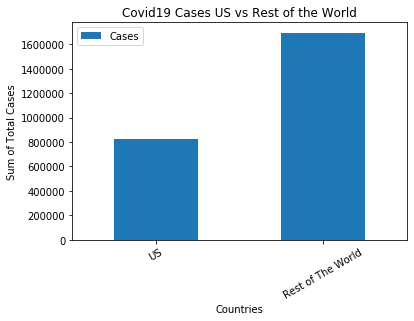

In [29]:
# Create a bar plot
plotdata = pd.DataFrame(
    {"Cases": [us_tot_cases,rest_of_world_tot_cases]}, 
    index=["US", "Rest of The World"])
# Plot a bar chart
plotdata.plot(kind="bar")
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Covid19 Cases US vs Rest of the World")
plt.xlabel("Countries")
plt.ylabel("Sum of Total Cases")

The above barchart shows us that US cases are almost half compared to rest of the world

#### Comparison of deaths in USA vs Rest of the World

Text(0, 0.5, 'Sum of Total Deaths')

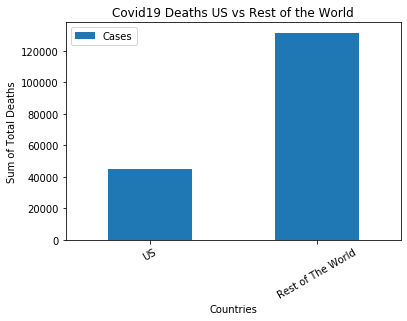

In [30]:
# Create a bar plot
plotdata = pd.DataFrame(
    {"Cases": [us_tot_deaths,rest_of_world_tot_deaths]}, 
    index=["US", "Rest of The World"])
# Plot a bar chart
plotdata.plot(kind="bar")
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Covid19 Deaths US vs Rest of the World")
plt.xlabel("Countries")
plt.ylabel("Sum of Total Deaths")

The above chart shows that deaths in usa are 25% of the entire world.

#### Determine Total Number of Tests

In [31]:
df.total_tests.sum()

266400109.0

#### Plotting total number of cases and total deaths worldwide

In [53]:
# Pivot the data on date and aggregare on cases and deaths
pivoted = pd.pivot_table(df, index=['date'],values=['new_cases', 'new_deaths'],
                    aggfunc= {'new_cases':['sum'],
                               'new_deaths':['sum']
                                })

In [54]:
pivoted.head()

,new_cases,new_deaths
,sum,sum
date,,
2019-12-31,27,0
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,17,0
2020-01-04,0,0


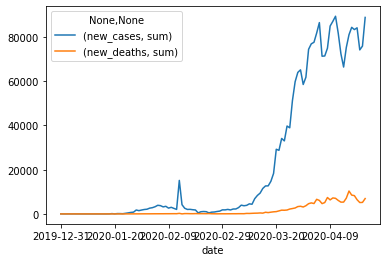

In [55]:
pivoted.plot()

The number of cases is rising globally and the curve is not flattening or going down at the moment

#### Country Wise Comparison of Number of Cases

In [56]:
#Creating horizontal Bar Chart to find out total cases in all the countries 
pivoted1 = pd.pivot_table(df, index=['location'],values=['new_cases', 'new_deaths'],
                    aggfunc= {'new_cases':['sum'],
                               'new_deaths':['sum']
                                })

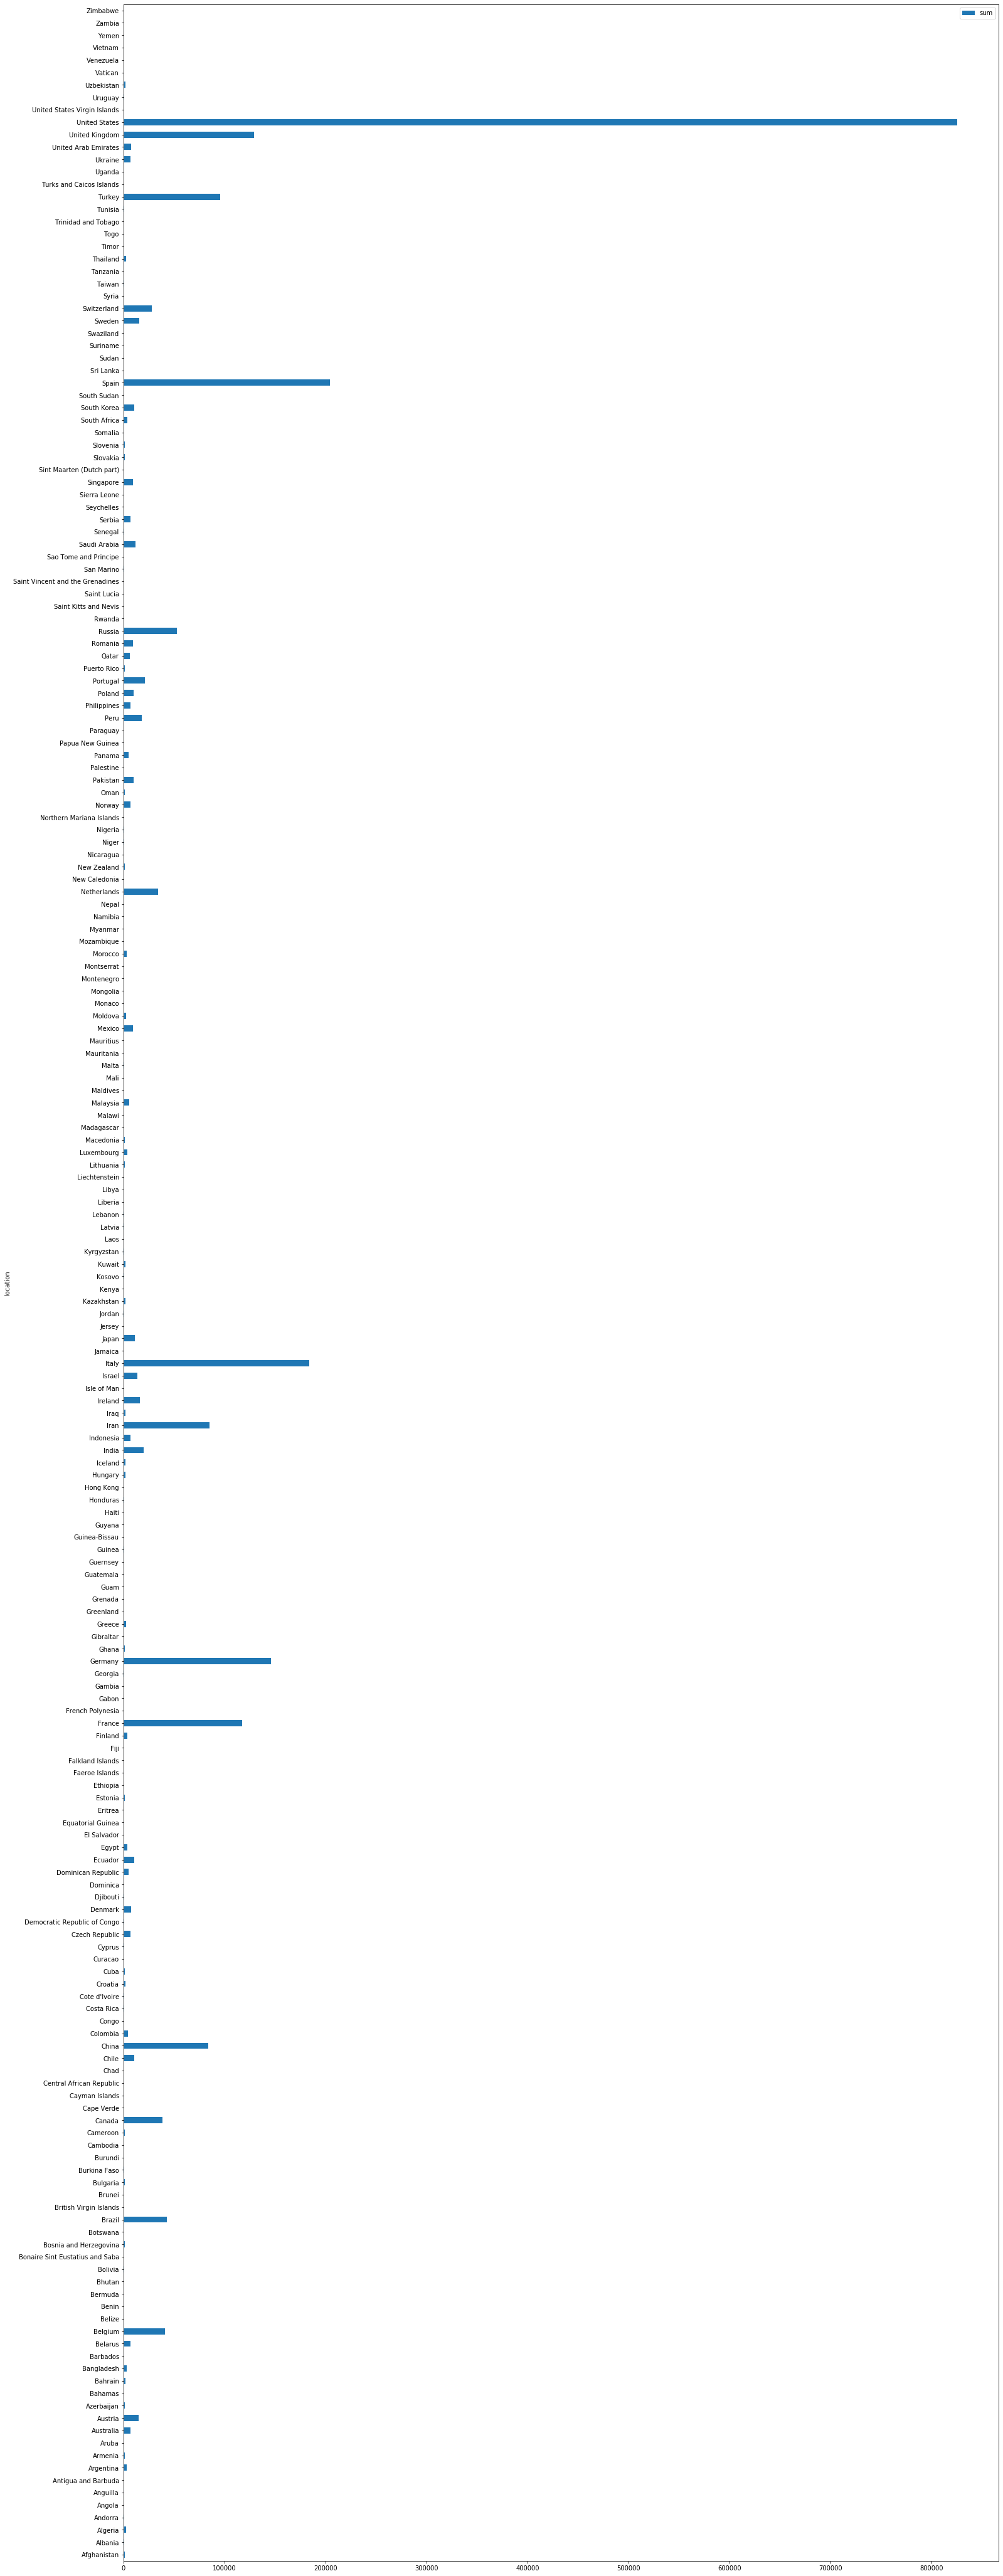

In [57]:
# Create a horizontal bar chart to understand the number of cases across the world.
'''
 A horizontal bar chart would give an idea of which countries around the world have most number of cases
'''
pivoted1['new_cases'].plot(kind='barh', figsize=(25,75))

From the horizontal bar chart we can see that USA and European Coutries and China have most number of cases

### Feature Engineering 

Now for this part we need to group columns by location to calculate total of deaths, cases and tests 

In [80]:
#Creating a new dataframe grouped by each country

'''
 Slice a group from the original dataframe using groupby() on location and then use sum() to filter data on cases, deaths and tests
'''
grouped=df.groupby('location')['new_deaths', 'new_cases', 'new_tests'].sum()

In [81]:
# Sort countries by number of Deaths and create another grouping
grouped1= grouped.sort_values(['new_deaths'], ascending=[False])

In [82]:
# Sort countries by number of confirmed cases and create respective grouping
grouped2=grouped.sort_values(['new_cases'], ascending=[False]);

In [83]:
# Sort countries by number of tests by creating  respective grouping
grouped3=grouped.sort_values(['new_tests'], ascending=[False])

In [84]:
# reset the index in odert to extract top countries later
grouped1 = grouped1.reset_index('location')

In [85]:
# reset the index in odert to extract top countries later
grouped2 = grouped2.reset_index('location')

In [86]:
# reset the index in odert to extract top countries later
grouped3= grouped3.reset_index('location')

In [87]:
#Slicing top 15 countries from dataframe grouped1
grouped1=grouped1.iloc[:15]

In [88]:
#Slicing top 15 countries from dataframe grouped2
grouped2= grouped2.iloc[:15]


In [89]:
#Slicing top 15 countries from dataframe grouped3
grouped3= grouped3.iloc[:15]


In [90]:
# display results of grouped1
grouped1= grouped1[['location', 'new_deaths']]
grouped1

,location,new_deaths
0,United States,45063
1,Italy,24648
2,Spain,21282
3,France,20796
4,United Kingdom,17337
5,Belgium,5998
6,Iran,5297
7,Germany,4879
8,China,4636
9,Netherlands,3916


In [91]:
#Slicing the relevant columns
grouped2= grouped2[['location', 'new_cases']]

In [92]:
#Display contents of grouped2
grouped2

,location,new_cases
0,United States,825041
1,Spain,204178
2,Italy,183957
3,Germany,145694
4,United Kingdom,129044
5,France,117324
6,Turkey,95591
7,Iran,84802
8,China,83864
9,Russia,52763


In [93]:
#Slicing the relevant columns
grouped3= grouped3[['location', 'new_tests']]

In [94]:
#Display contents of grouped2
grouped3

,location,new_tests
0,United States,4152789.0
1,Russia,2117849.0
2,Italy,1508927.0
3,Turkey,740926.0
4,South Korea,577554.0
5,Canada,506578.0
6,Australia,451554.0
7,United Kingdom,411161.0
8,India,365654.0
9,Israel,261215.0


### Country wise Comparison of Mortality due to Covid19

In [95]:
#convert datetimes to strings
'''
date is converted to string in order to display it on the barchart and not interfere with calculations
'''
grouped1['location'] = grouped1['location'].apply(str)
#convert dataframe to dict
data = grouped1.to_dict(orient='list')
dates = grouped1['location'].tolist()

In [96]:
# Create a Bokeh bar chart for countries with most number of deaths
source = ColumnDataSource(data=data)

#get max possible value of plotted columns with some offset
p = figure(x_range=dates, y_range=(0, grouped1['new_deaths'].values.max() + 1000),
           plot_height=250, title="Top 15 Countries with highest number of deaths",
           toolbar_location=None, tools="", plot_width= 1200)

p.vbar(x=dodge('location', 0, range=p.x_range), top='new_deaths', width=0.4, source=source,
       color="SteelBlue")

p.add_tools(HoverTool(tooltips=[("total_deaths", "$y{int}")]))
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
show(p)


### Country wise comparison of Covid 19 Cases

In [97]:
#convert datetimes to strings
grouped2['location'] = grouped2['location'].apply(str)
#convert dataframe to dict
data2 = grouped2.to_dict(orient='list')
dates2 = grouped2['location'].tolist()

In [98]:
# Create a Bokeh bar chart for countries with most number of cases
source = ColumnDataSource(data=data2)

#get max possible value of plotted columns with some offset
l = figure(x_range=dates2, y_range=(0, grouped2['new_cases'].values.max() + 100000), 
           plot_height=300, title="Top 15 Countries with highest number of cases",
           toolbar_location=None, tools="", plot_width= 1200)

l.vbar(x=dodge('location', 0, range=p.x_range), top='new_cases', width=0.4, source=source,
       color="SteelBlue")

l.add_tools(HoverTool(tooltips=[("total_cases", "$y{int}")]))
l.x_range.range_padding = 0.1
l.xgrid.grid_line_color = None
show(l)


United States has around .825 million cases which is way ahead of Spain which is at second place with .200 m cases

### Country wise Comparison of Covid19 Testing

In [99]:
#convert datetimes to strings
grouped3['location'] = grouped3['location'].apply(str)
#convert dataframe to dict
data3 = grouped3.to_dict(orient='list')
dates3 = grouped3['location'].tolist()

In [65]:
# Create a Bokeh bar chart for countries with most number of tests conducted
source = ColumnDataSource(data=data3)
#get max possible value of plotted columns with some offset
p = figure(x_range=dates3, y_range=(0, grouped3['new_tests'].values.max() + 100000), 
           plot_height=250, title="Top 15 countries with highest number of Covid19 Tests",
           toolbar_location=None, tools="", plot_width= 1200)

p.vbar(x=dodge('location', 0, range=p.x_range), top='new_tests', width=0.4, source=source,
       color="SteelBlue")


p.add_tools(HoverTool(tooltips=[("total_tests", "$y{int}")]))
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
show(p)


The above bar graph shows that USA has the most number of Covid19 Tests so far

### Timeline od Covid19 related deaths in China and top 5 countries

In [66]:
#select the columns of total_deaths, total_cases, date, location and create a new dataframe
df_new=df[['date', 'location', 'new_deaths', 'new_cases']]

In [120]:
df_new.tail()

,date,location,new_deaths,new_cases,log_new_deaths,log_new_cases
11999,2020-04-18,United States,3770,30833,3.576341,4.489016
12000,2020-04-19,United States,1856,32922,3.268578,4.517486
12001,2020-04-20,United States,1772,24601,3.248464,4.390953
12002,2020-04-21,United States,1857,28065,3.268812,4.448165
12003,2020-04-22,United States,2524,37289,3.402089,4.571581


In [67]:
# select the rows of top 5 countries and China which had highest number of deaths in above chart 
options = ['United States', 'United Kingdom', 'Italy', 'Spain', 'France', 'China'] 
df_new= df_new[df_new['location'].isin(options)]
  

In [68]:
# Date is an object type
df_new.date.dtype

dtype('O')

In [69]:
#convert date to datetime object
df_new['date'] = pd.to_datetime(df_new['date'], errors='coerce')

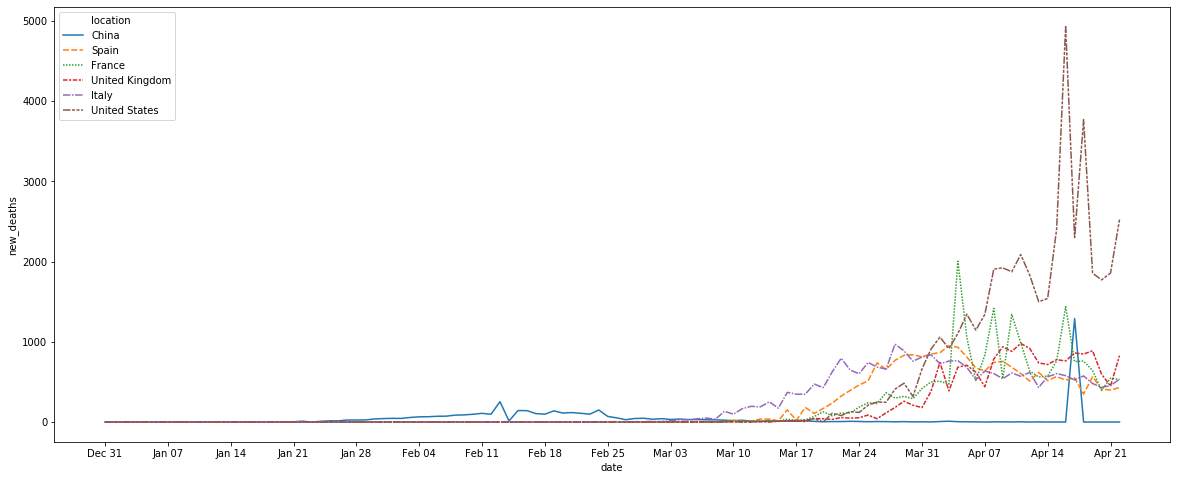

In [70]:
# Create a timeline line chart about number of deaths in top 5 countries
import seaborn as sns
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=df_new, x='date', y='new_deaths', hue='location', style='location', ax=ax)
# set the frequency for labelling the xaxis

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

The most deaths peaked in China in Februrary with Italy and Spain picking up in March but by third week of March US was rising rapidly

### Comparison of Timeline of Mortality in top Countries on Logarithmic Scale

In [113]:
df_new['log_new_deaths']=np.log10(df_new['new_deaths'])

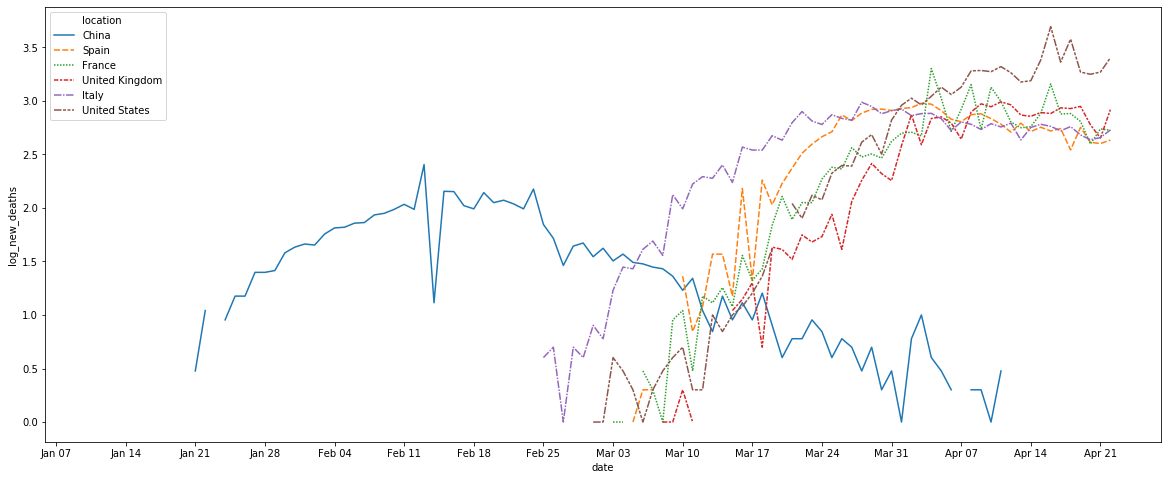

In [114]:
# Create a timeline line chart about number of deaths in top 5 countries
import seaborn as sns
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=df_new, x='date', y='log_new_deaths', hue='location', style='location', ax=ax)
# set the frequency for labelling the xaxis

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

The logarithmic scale shows China's curve has gone done while United State and European Countries like Italy, Spain, Uk are in middle of their curves at this stage in terms of mortality

### Timeline of Covid19 Cases in China and top 5 countries

In [71]:
#select the top 5 countries in terms of number of cases
options2 = ['United States', 'Germany', 'Italy', 'Spain', 'China', 'United Kingdom'] 
df_new2= df_new[df_new['location'].isin(options2)]

In [72]:
#convert date to datetime object
df_new2['date'] = pd.to_datetime(df_new2['date'], errors='coerce')

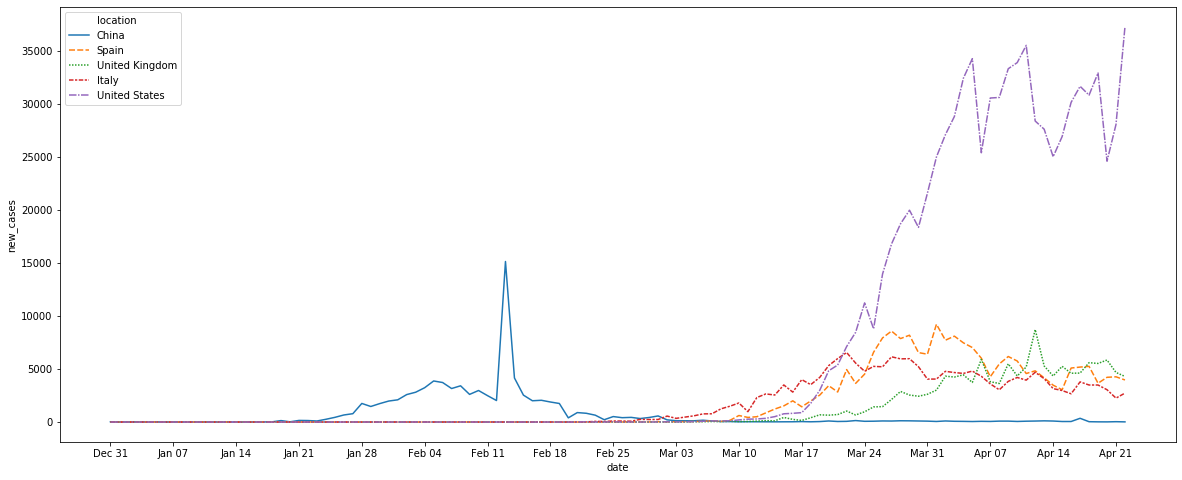

In [73]:
# Create a timeline about number of cases in top 5 countries using line chart
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=df_new2, x='date', y='new_cases', hue='location', style='location', ax=ax)
# set the frequency for labelling the xaxis

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

The Cases in China were surging in February but by March an increase was noticed in Italy China, UK and USA. However, Italy and Spain have flattened the curve but in USA it is going on increasing and fluctuating. 

### Comparison of Timeline of Cases in top countries on Logarithmic Scale

In [117]:
# create a log scale column in dataframe for cases
df_new2['log_new_cases']=np.log10(df_new2['new_cases'])

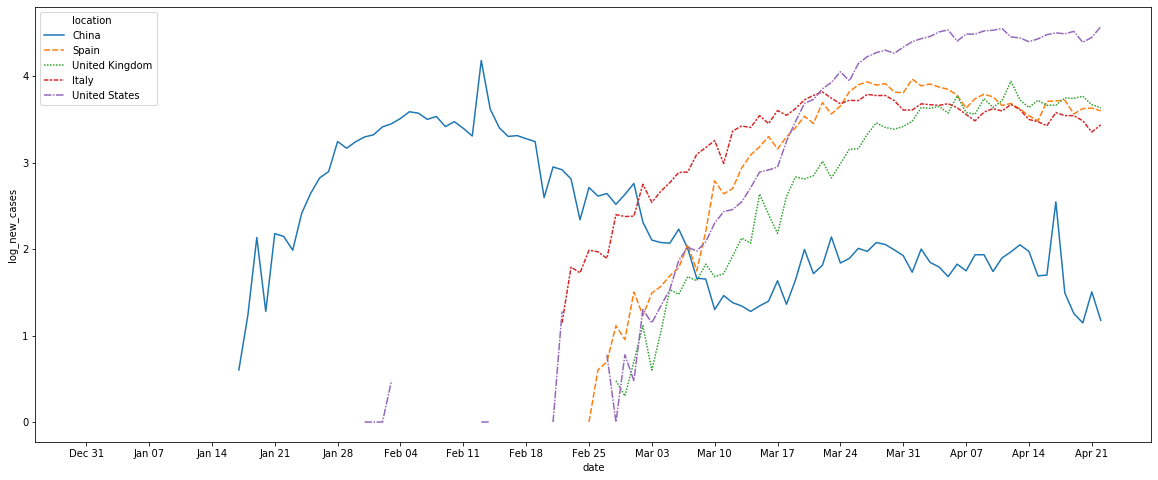

In [118]:
# Create a timeline about number of cases in top 5 countries using line chart
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=df_new2, x='date', y='log_new_cases', hue='location', style='location', ax=ax)
# set the frequency for labelling the xaxis

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

The log scale shows that China's cases had a peak in February and are now making another peak in April. US and Italy and Spain are in middle of their peaks and are yet to go down.

### Covid 19 Cases in United States

In [104]:
# Load the New York Times Dataset on all the states in USA 
df_us= pd.read_csv(r'us-states.csv')

In [105]:
df_us.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


### Statewise Covid 19 Caes and Deaths in United States

In [106]:
# grouping the data by states and finding the total cases and total deaths
grouped_states=df_us.groupby('state')['cases', 'deaths'].max()

In [107]:
grouped_states

,cases,deaths
state,,
Alabama,5327,186
Alaska,327,7
American Samoa,0,0
Arizona,5251,213
Arkansas,2262,43
California,35844,1316
Colorado,10447,484
Connecticut,20360,1423
Delaware,2931,82


In [108]:
# Sort the dataframe by number of cases
grouped_states= grouped_states.sort_values(['cases'], ascending=[False])

In [109]:
grouped_states= grouped_states.reset_index('state')
grouped_states=grouped_states.iloc[:15]

In [110]:
#View the dataframe
grouped_states

,state,cases,deaths
0,New York,251720,14828
1,New Jersey,92387,4753
2,Massachusetts,41199,1961
3,California,35844,1316
4,Pennsylvania,35384,1620
5,Illinois,33059,1479
6,Michigan,32935,2698
7,Florida,27861,866
8,Louisiana,24854,1405
9,Texas,20949,552


### Top 15 States in USA in terms of Number of Cases of Covid 19

In [111]:
#convert datetimes to strings
grouped_states['state'] = grouped_states['state'].apply(str)
#convert dataframe to dict
data_states = grouped_states.to_dict(orient='list')
dates_states = grouped_states['state'].tolist()

In [112]:
# Create a Bar Chart for the top 15 states in USA with most number of confirmed Covid19 Cases
source = ColumnDataSource(data=data_states)

#get max possible value of plotted columns with some offset
p = figure(x_range=dates_states, y_range=(0, grouped_states['cases'].values.max() + 10000),
           plot_height=250, title="Top 15 US States with most number of confirmed cases",
           toolbar_location=None, tools="", plot_width= 1200)

p.vbar(x=dodge('state', 0, range=p.x_range), top='cases', width=0.4, source=source,
       color="SteelBlue")

p.add_tools(HoverTool(tooltips=[("total_cases", "$y{int}")]))
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
show(p)


New York is leading the states in terms of Covid 19 related deaths and Cases followed by New Jersey and Masachussets, all states with high densities of population.